
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 1 $$

Explain the project idea :Algorithms (such as Decision Tree, Random Forest, XGBoost, etc.) will be used to predict:

Will a new customer have a Poor, Standard, or Good credit rating?

Based on their data such as income, payment delays, number of loans, etc.


| **Column**                   | **Meaning (in English)**   | **Explanation**                                                               |
| ---------------------------- | -------------------------- | ----------------------------------------------------------------------------- |
| **ID / Customer_ID**         | Customer ID                | A unique number for each customer, used for identification (usually dropped). |
| **Month**                    | Month                      | The month in which the data was collected or updated.                         |
| **Name**                     | Name                       | The customer’s name (usually not relevant for analysis).                      |
| **Age**                      | Age                        | The age of the customer in years.                                             |
| **Occupation**               | Occupation                 | Type of job (e.g., Engineer, Doctor, Student…).                               |
| **Annual_Income**            | Annual Income              | The customer’s total yearly income.                                           |
| **Monthly_Inhand_Salary**    | Monthly In-hand Salary     | Actual salary received per month after deductions.                            |
| **Num_Bank_Accounts**        | Number of Bank Accounts    | How many bank accounts the customer has.                                      |
| **Num_Credit_Card**          | Number of Credit Cards     | Number of credit cards owned by the customer.                                 |
| **Interest_Rate**            | Interest Rate              | The interest rate the customer pays on loans.                                 |
| **Num_of_Loan**              | Number of Loans            | Total number of active loans the customer currently has.                      |
| **Type_of_Loan**             | Type of Loans              | Types of loans (e.g., Car, Education, Home…).                                 |
| **Delay_from_due_date**      | Delay from Due Date        | Number of days the customer delayed a payment.                                |
| **Num_of_Delayed_Payment**   | Number of Delayed Payments | How many times the customer has delayed payments.                             |
| **Changed_Credit_Limit**     | Changed Credit Limit       | Number of times the customer’s credit limit was changed.                      |
| **Num_Credit_Inquiries**     | Number of Credit Inquiries | Number of times the customer’s credit report was checked by banks/companies.  |
| **Credit_Mix**               | Credit Mix                 | Diversity of credit types (Good, Standard, Bad).                              |
| **Outstanding_Debt**         | Outstanding Debt           | The total amount the customer still owes.                                     |
| **Credit_Utilization_Ratio** | Credit Utilization Ratio   | Ratio of credit used to total available credit limit.                         |
| **Payment_Behaviour**        | Payment Behaviour          | How the customer pays (on time, delayed, early…).                             |
| **Payment_of_Min_Amount**    | Payment of Minimum Amount  | Whether the customer pays only the minimum amount or full balance.            |
| **Total_EMI_per_month**      | Total EMI per Month        | Total monthly loan installment amount.                                        |
| **Amount_invested_monthly**  | Amount Invested Monthly    | Amount invested by the customer each month.                                   |
| **Monthly_Balance**          | Monthly Balance            | The remaining balance at the end of the month.                                |
| **Credit_Score**             | Credit Score               | The target variable — final credit classification (Poor / Standard / Good).   |



# `01` Import Necessary Libraries

## `i` Default Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import KNNImputer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

----------------------------

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [4]:

train = pd.read_csv("C:\\Users\\DELL\Downloads\\train.csv.zip")
test = pd.read_csv("C:\\Users\\DELL\\Downloads\\test.csv.zip")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\DELL\AppData\Local\Temp\ipykernel_22652\263325173.py:1: SyntaxWarning: invalid escape sequence '\D'
  train = pd.read_csv("C:\\Users\\DELL\Downloads\\train.csv.zip")
C:\Users\DELL\AppData\Local\Temp\ipykernel_22652\263325173.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("C:\\Users\\DELL\Downloads\\train.csv.zip")


## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [5]:
from sklearn.model_selection import train_test_split
X = train.drop("Credit_Score", axis=1)
y = train["Credit_Score"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)


In [6]:
# نسخة للرسم قبل المعالجة (EDA raw)
train_plot_raw = x_train.copy()
train_plot_raw['Credit_Score'] = y_train.astype(str)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.


check Data

In [7]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [8]:
train.sample(10)

ID Customer_ID     Month                 Name Age          SSN  \
31066   0xcc08  CUS_0x50df     March         Diane Bartzl  36  117-43-4570   
70315  0x1b201  CUS_0x832f     April              Bremerd  53    #F%$D@*&8   
18392   0x81c6  CUS_0x8da2   January              Lesleye  52    #F%$D@*&8   
91911  0x23089  CUS_0xb32e    August                  NaN  32  645-78-2989   
70827  0x1b501  CUS_0x3d64     April  Carrick Mollenkampv  45    #F%$D@*&8   
94262  0x23e50  CUS_0x257e      July         Roumeliotist  23  049-11-7552   
18053   0x7fc7  CUS_0x2d48      June               Alpern  20  508-50-7959   
26473   0xb11f  CUS_0xb936  February                 Jimn  28  466-13-8474   
59465  0x1726f  CUS_0x9c14  February               Zhangq  38  339-76-2171   
65996  0x198b2  CUS_0xbb3c       May        Ilaina Jonash  32  956-87-6952   

          Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
31066         Lawyer      15845.47            1039.455833                  5   
70315         Writer     17329.075            1167.089583                  0   
18392  Media_Manager     118446.69            9708.557500                  3   
91911      Developer      121179.4           10202.283333               1647   
70827        _______      19493.51            1662.459167                  6   
94262       Musician       29074.2            2595.850000                  8   
18053       Engineer     132180.24           11119.020000                  5   
26473         Writer      34898.52            2923.210000                  3   
59465     Journalist      28771.76            2497.646667                  7   
65996        Teacher     170008.72           14178.393333                  3   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
31066  ...    Standard           1275.75                35.803352   
70315  ...        Good            126.19                35.441966   
18392  ...           _            912.75                36.715307   
91911  ...           _           1399.72                40.067035   
70827  ...         Bad           1783.34                35.611555   
94262  ...    Standard            867.27                27.304113   
18053  ...        Good            747.86                38.926725   
26473  ...           _           1552.71                31.509113   
59465  ...         Bad           4044.13                25.669091   
65996  ...        Good            881.44                30.990299   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
31066    6 Years and 5 Months                    Yes           73.239494   
70315   26 Years and 1 Months                     No           24.096394   
18392   15 Years and 2 Months                     No            0.000000   
91911  31 Years and 11 Months                     No          162.971545   
70827   14 Years and 5 Months                    Yes           21.854408   
94262   30 Years and 9 Months                     NM           52.507950   
18053   32 Years and 9 Months                     No          155.161834   
26473   14 Years and 5 Months                    Yes           91.848647   
59465    1 Years and 8 Months                    Yes          106.706122   
65996   29 Years and 0 Months                     NM            0.000000   

      Amount_invested_monthly                 Payment_Behaviour  \
31066       70.30342197549986    Low_spent_Small_value_payments   
70315      45.879027993147155                            !@9#%8   
18392       672.6335230478164    Low_spent_Large_value_payments   
91911      384.46698266163264   Low_spent_Medium_value_payments   
70827      141.09085327313926    Low_spent_Large_value_payments   
94262       47.80683687867348  High_spent_Medium_value_payments   
18053       533.2450023927314   Low_spent_Medium_value_payments   
26473               __10000__    Low_spent_Large_value_payments   
59465      306.71401349989856    Low_spent_Small_value_payments   
65996

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [11]:
#check missing valuse 

train.isnull().sum()
train.isnull().any(axis=1) # to rows

0        False
1         True
2         True
3         True
4         True
         ...  
99995    False
99996    False
99997    False
99998     True
99999    False
Length: 100000, dtype: bool

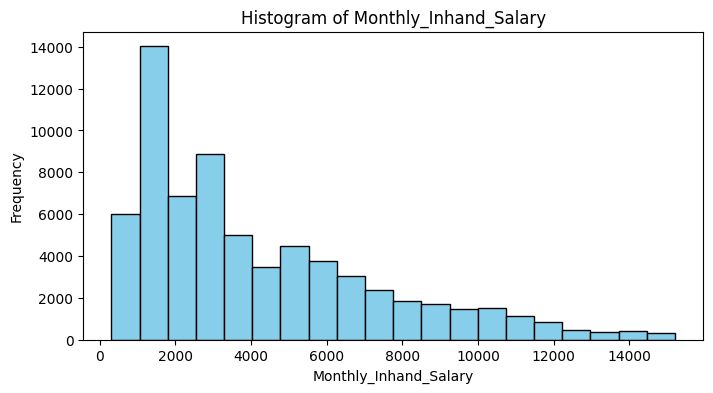

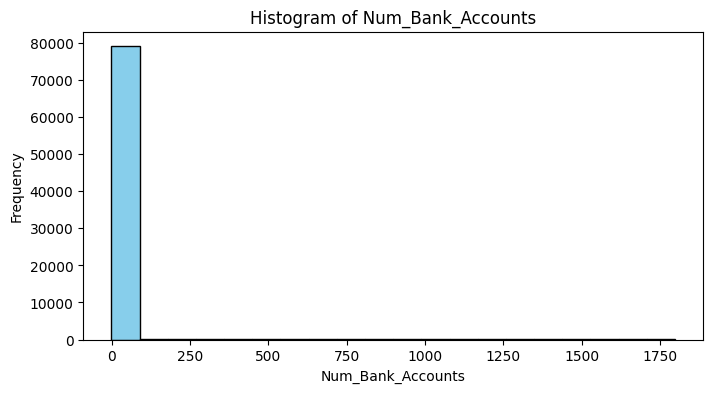

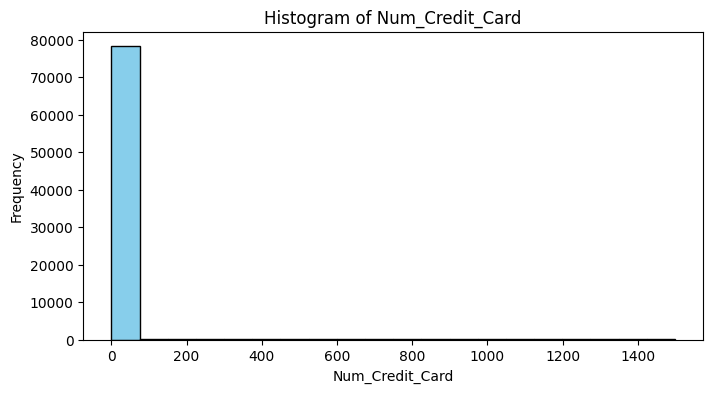

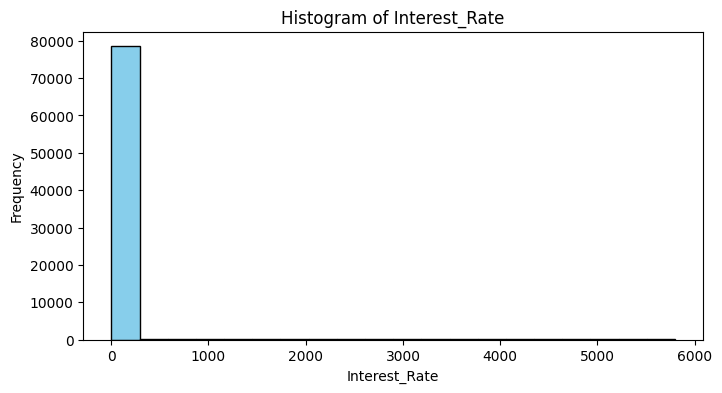

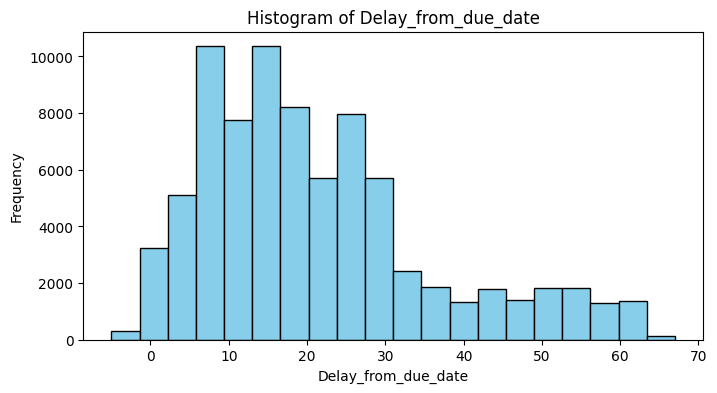

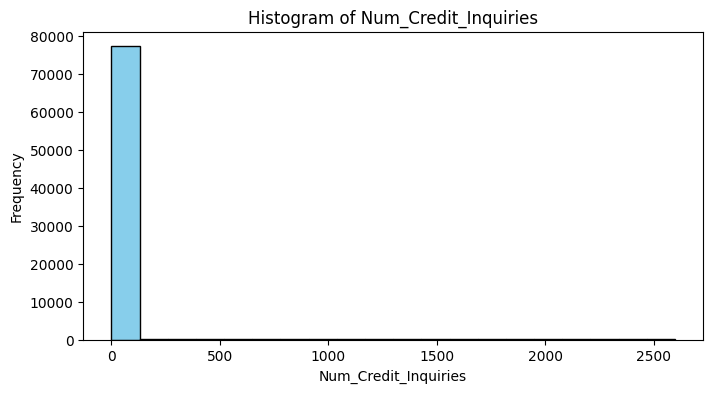

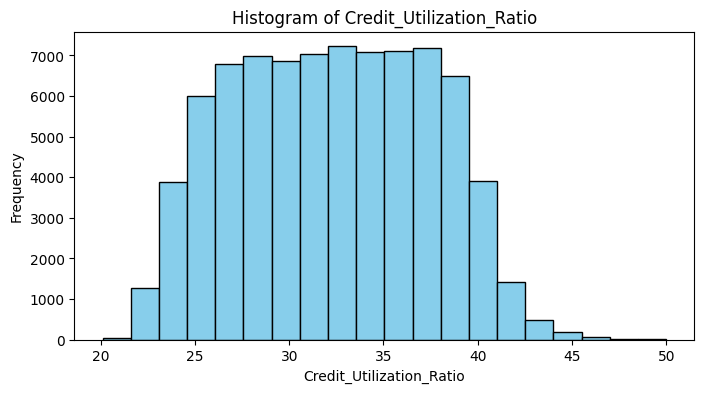

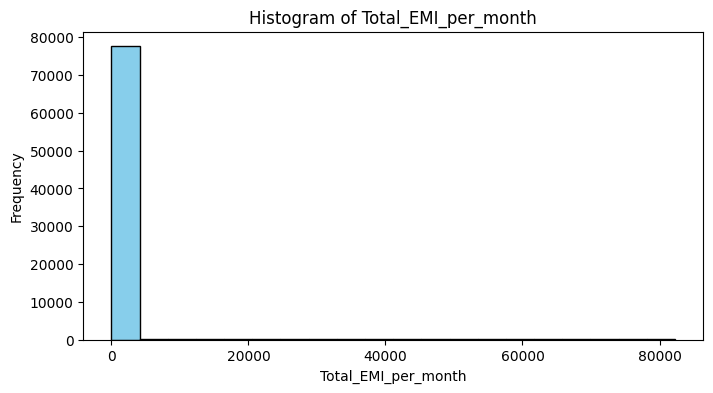

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# افترض ان عندك DataFrame اسمه df
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns  # تحديد الأعمدة العددية

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    plt.hist(x_train[col], bins=20, color='skyblue', edgecolor='black')  # رسم الـ histogram
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


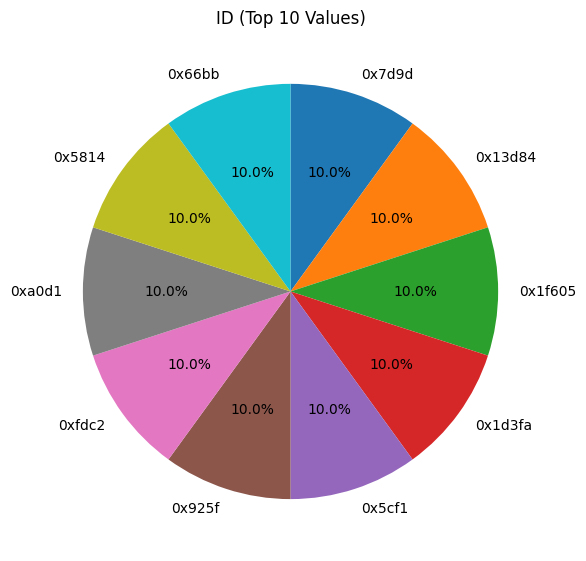

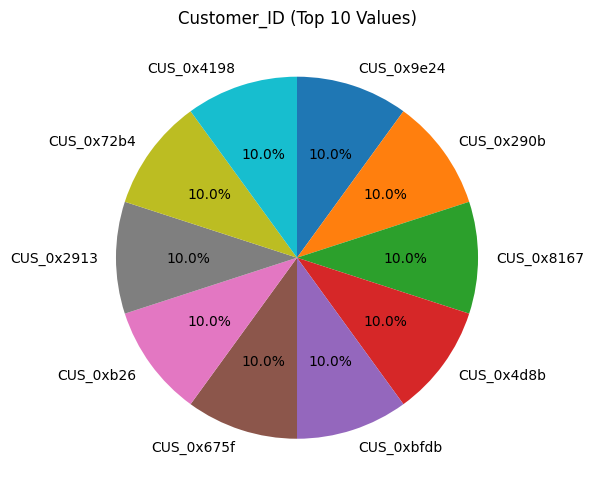

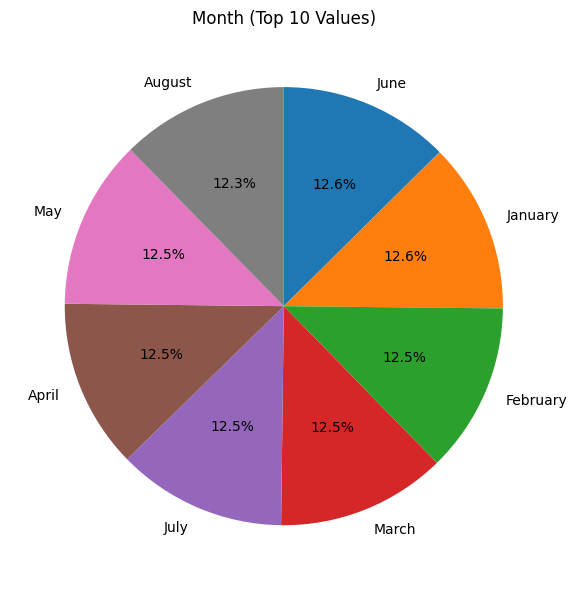

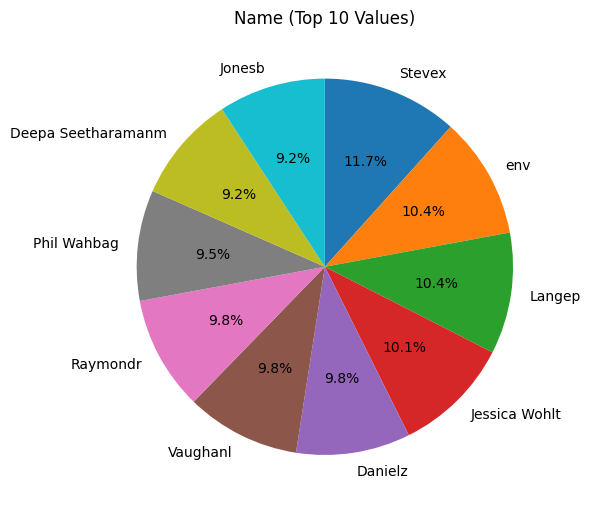

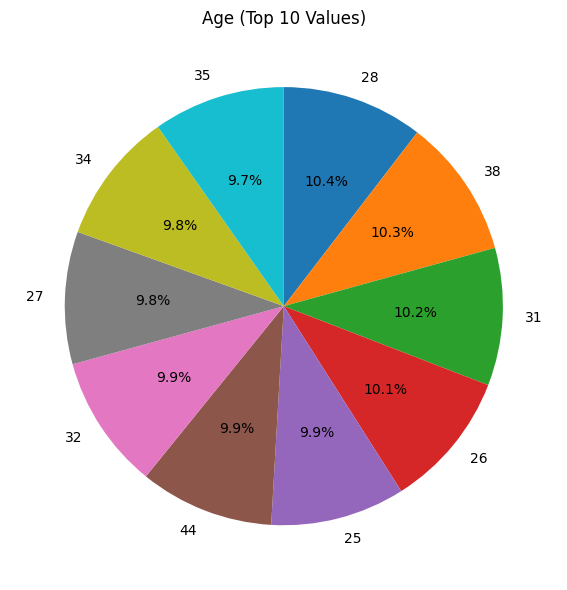

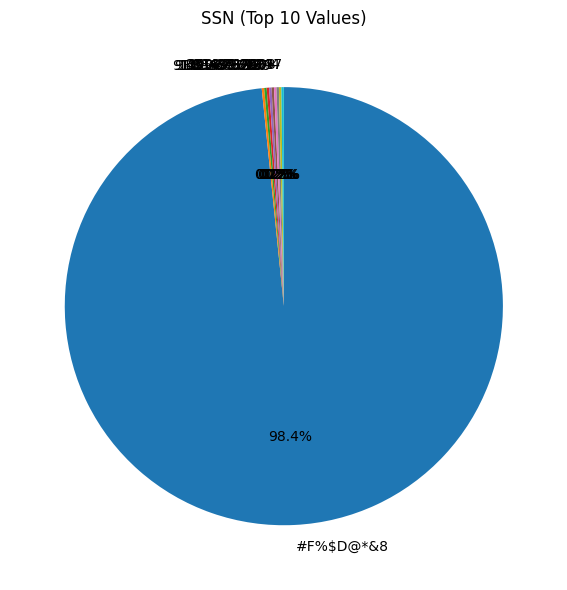

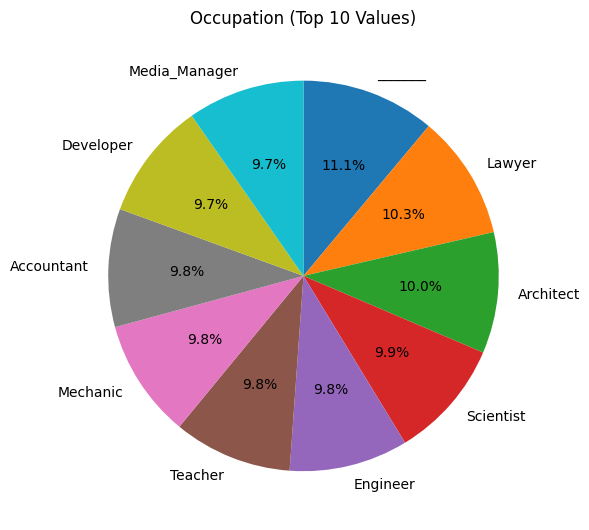

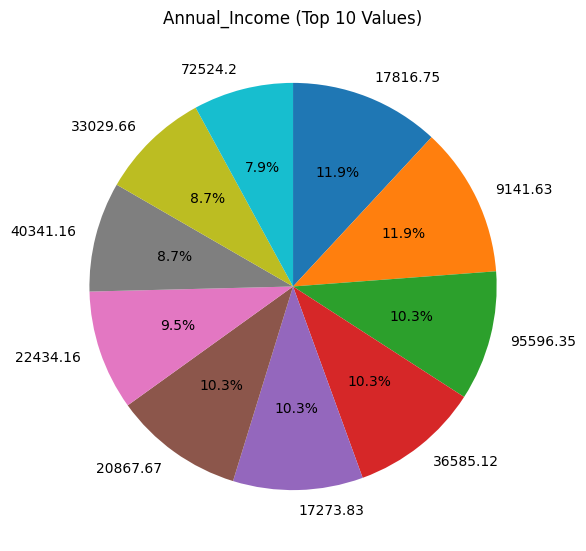

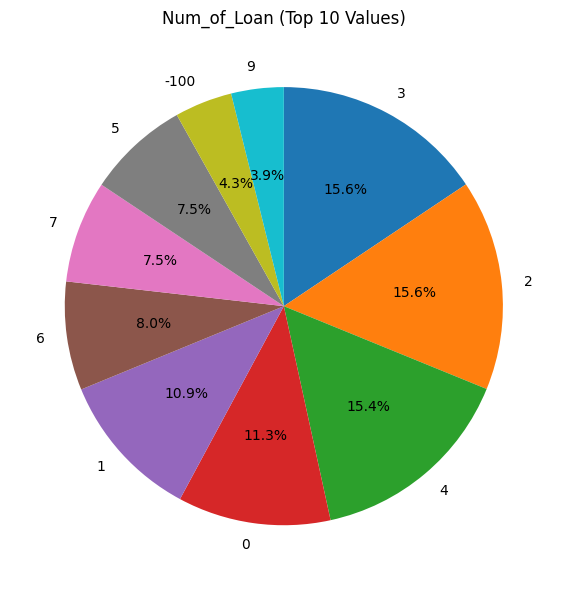

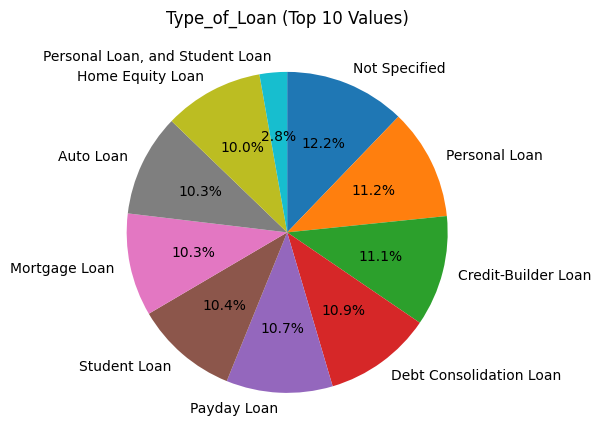

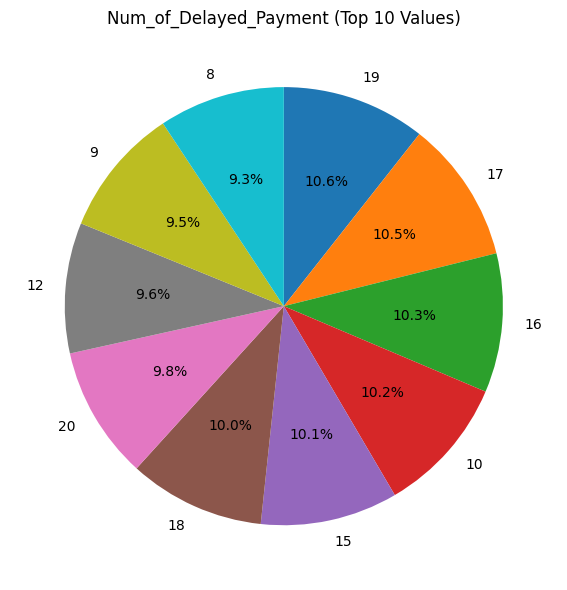

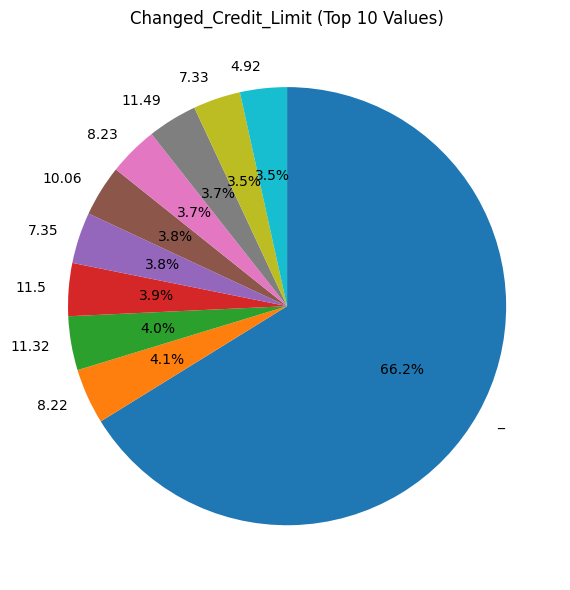

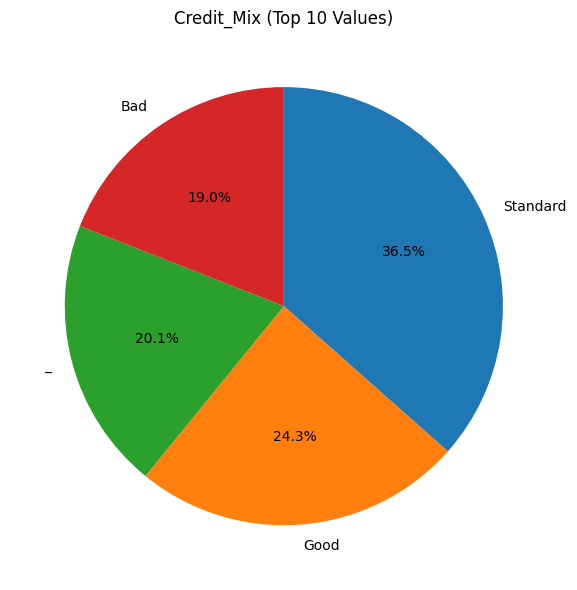

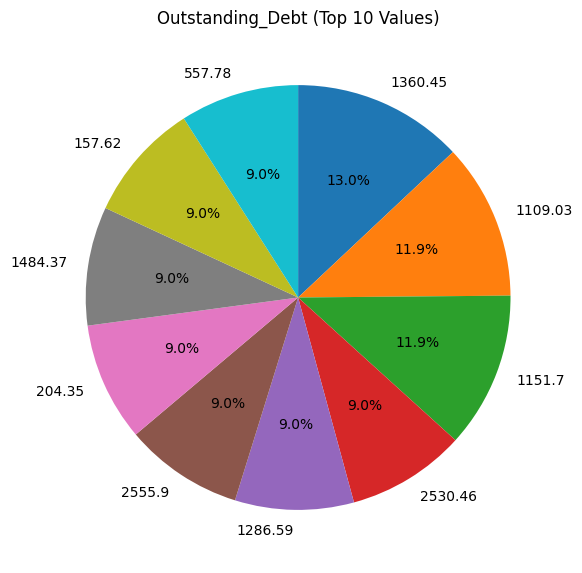

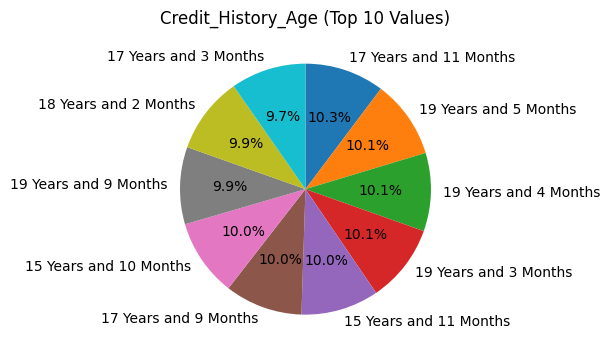

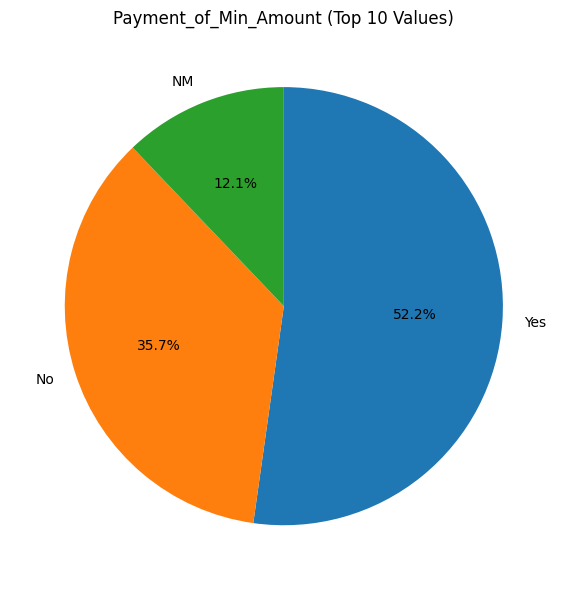

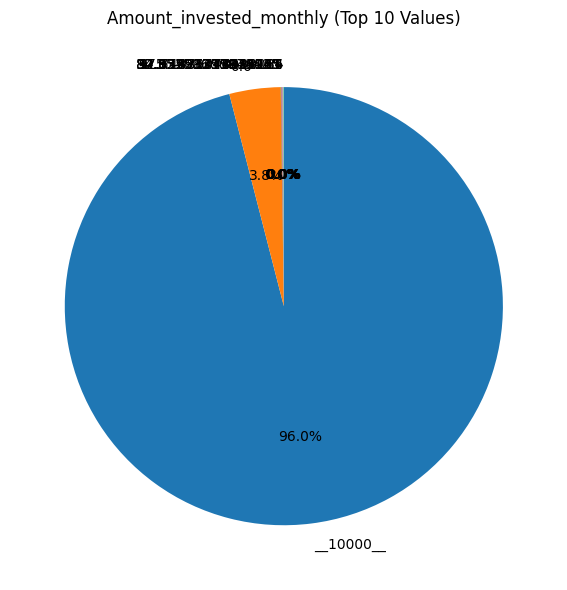

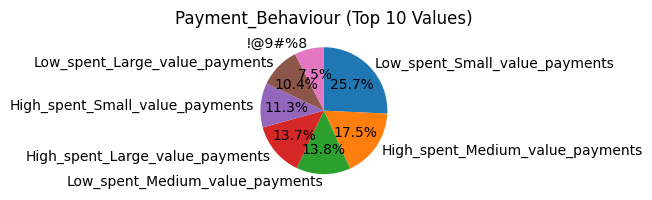

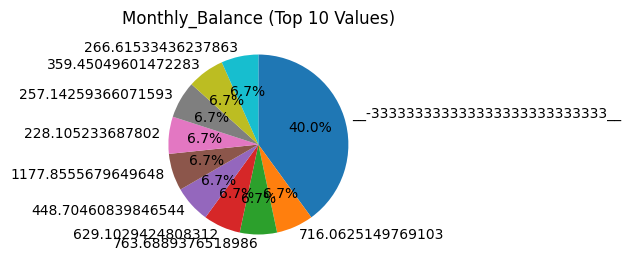

In [13]:
 

categorical_cols1 = x_train.select_dtypes(include=['object']).columns

for col in categorical_cols1:
    plt.figure(figsize=(6,6))
    top_values = x_train[col].value_counts().iloc[:10]
    plt.pie(
        top_values.values,
        labels=top_values.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    plt.title(f'{col} (Top 10 Values)')
    plt.tight_layout()
    plt.show()

In [14]:
#Drop duplicates and unnecessary columns
# ========================
cols_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']
x_train.drop(columns=cols_to_drop, inplace=True)
x_test.drop(columns=cols_to_drop, inplace=True)

x_train.drop_duplicates(inplace=True)
x_test.drop_duplicates(inplace=True)

In [15]:
#Convert Credit_History_Age to months
# ========================
import re
def convert_to_months(text):
    match = re.match(r"(\d+) Years? and (\d+) Months?", str(text))
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years*12 + months
    return np.nan

x_train["Credit_History_Age"] = x_train["Credit_History_Age"].apply(convert_to_months)
x_test["Credit_History_Age"] = x_test["Credit_History_Age"].apply(convert_to_months)

In [16]:
#Handle numeric columns NaN
# ========================
numeric_cols = ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts',
                'Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date',
                'Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries',
                'Outstanding_Debt','Credit_Utilization_Ratio','Total_EMI_per_month',
                'Amount_invested_monthly','Monthly_Balance','Credit_History_Age']

# Convert to numeric if not already
for col in numeric_cols:
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')

# KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')
x_train[numeric_cols] = imputer.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = imputer.transform(x_test[numeric_cols])


In [17]:
x_train.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                9109
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
dtype: int64

In [18]:

x_train['Type_of_Loan'] = x_train['Type_of_Loan'].fillna('Unknown')
x_test['Type_of_Loan'] = x_test['Type_of_Loan'].fillna('Unknown')

 
x_train['Type_of_Loan'] = x_train['Type_of_Loan'].astype(str)
x_test['Type_of_Loan'] = x_test['Type_of_Loan'].astype(str)

 
x_train['Type_of_Loan'] = x_train['Type_of_Loan'].apply(lambda x: [i.strip() for i in x.split(',')])
x_test['Type_of_Loan'] = x_test['Type_of_Loan'].apply(lambda x: [i.strip() for i in x.split(',')])


In [19]:
x_train.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [20]:
#Correct negative/wrong numeric values
# ========================
for df in [x_train, x_test]:
    df.loc[df['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = df['Delay_from_due_date'].median()
    df.loc[df['Num_of_Loan'] < 0, 'Num_of_Loan'] = df['Num_of_Loan'].median()
    df.loc[df['Age'] < 0, 'Age'] = df['Age'].median()
    df.loc[df['Monthly_Inhand_Salary'] > df['Annual_Income']/12, 'Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].median()


In [21]:
import pandas as pd

# تحديد الأعمدة العددية
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns

# تخزين الأعمدة التي تحتوي على Outliers
outlier_cols = []

for col in numeric_cols:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # التحقق من وجود أي Outlier
    if ((x_train[col] < lower_bound) | (x_train[col] > upper_bound)).any():
        outlier_cols.append(col)

print("  Outliers:", outlier_cols)


  Outliers: ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [22]:
#Handle Outliers (capping)
# ========================
for col in ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
            'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
              'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    x_train[col] = np.clip(x_train[col], lower, upper)
    x_test[col] = np.clip(x_test[col], lower, upper)


## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

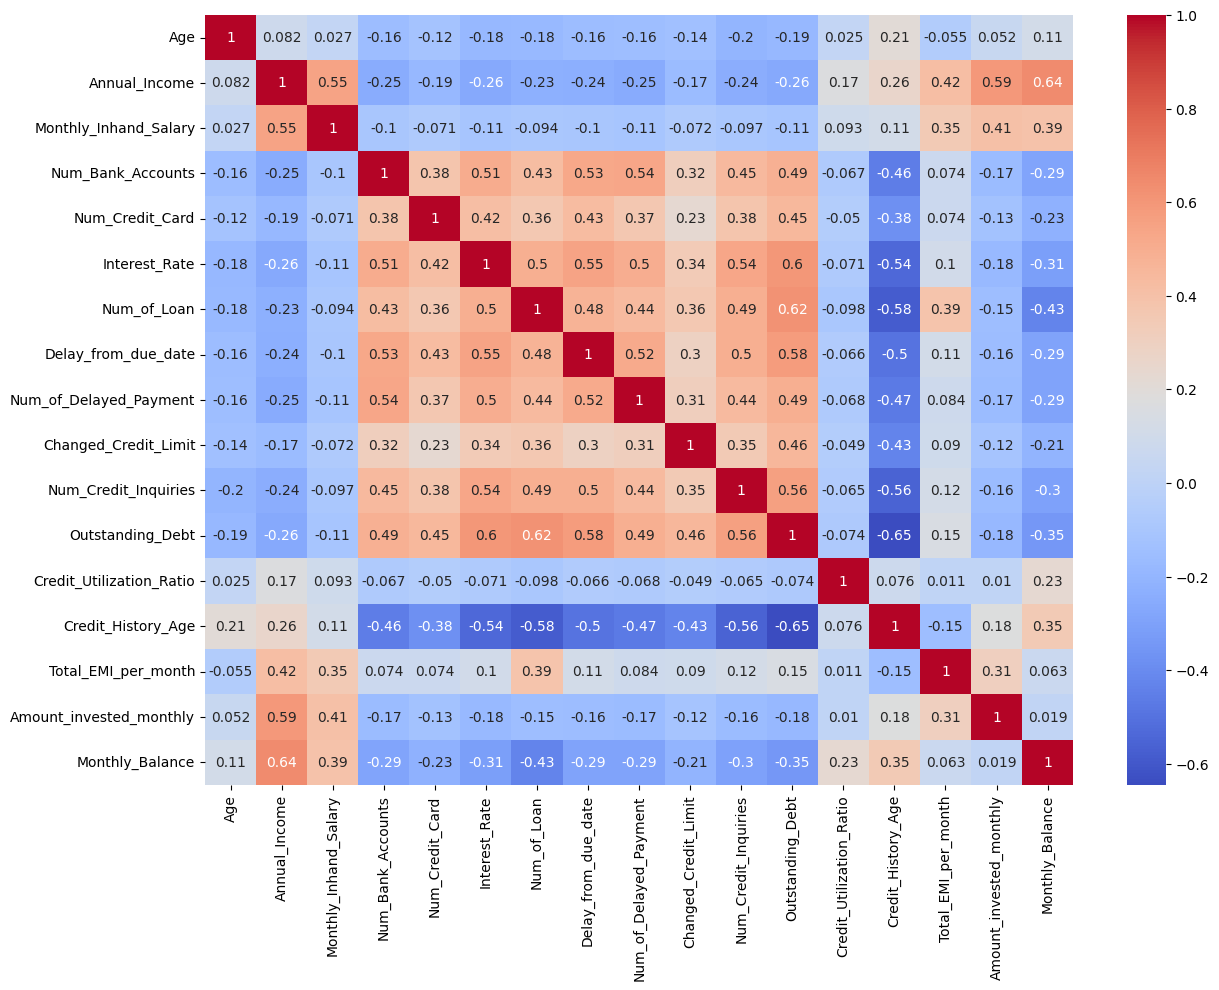

In [23]:
# Calculate correlation matrix between each column and column
corr_matrix = x_train.select_dtypes(include=['number']).corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

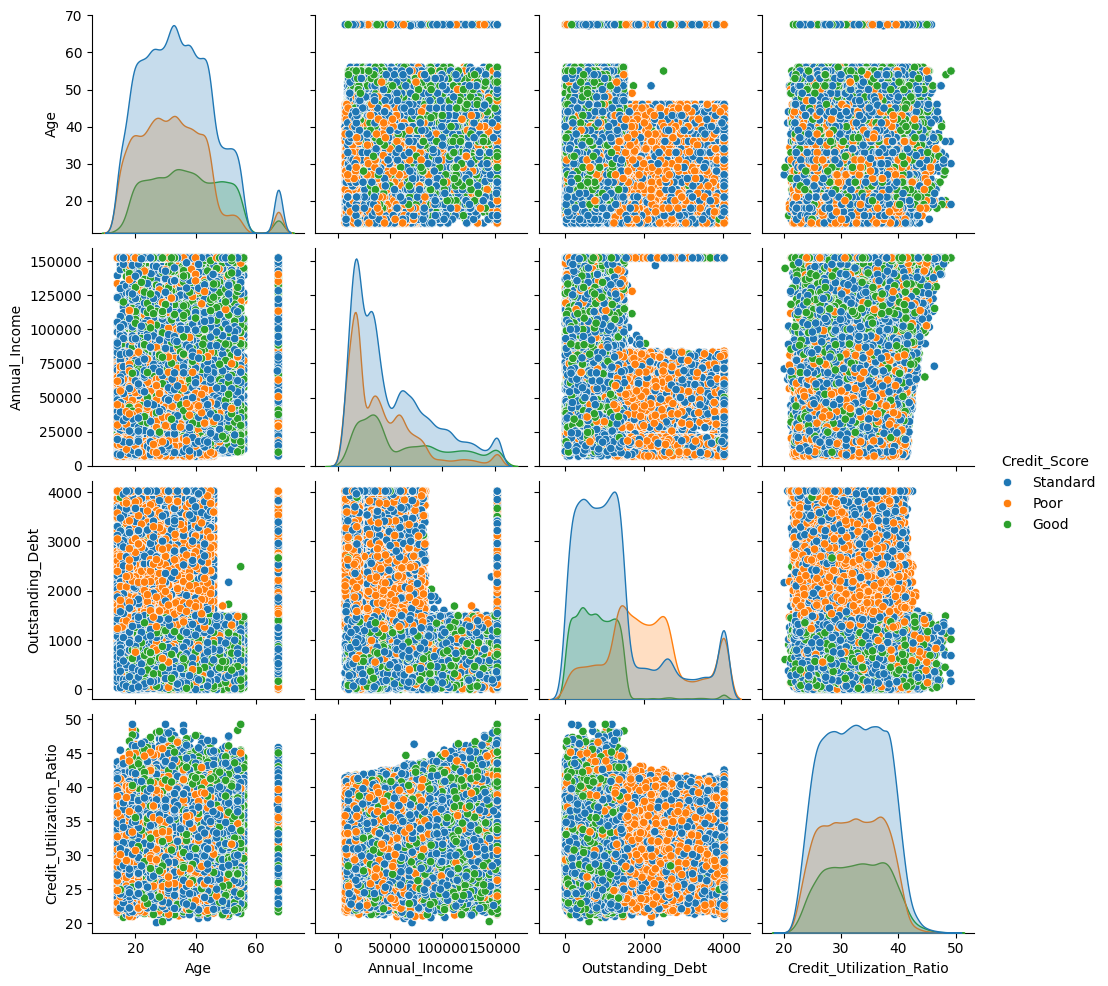

In [24]:
train_plot = x_train.copy()
train_plot['Credit_Score'] = y_train.astype(str)
sns.pairplot(train_plot, vars=['Age','Annual_Income','Outstanding_Debt','Credit_Utilization_Ratio'], hue='Credit_Score')
plt.show()



In [25]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

cat_cols = ['Occupation','Payment_Behaviour','Credit_Mix','Payment_of_Min_Amount']
for col in cat_cols:
    print(f"{col}: {cramers_v(train_plot[col], train_plot['Credit_Score']):.3f}")


Occupation: 0.030
Payment_Behaviour: 0.085
Credit_Mix: 0.401
Payment_of_Min_Amount: 0.312


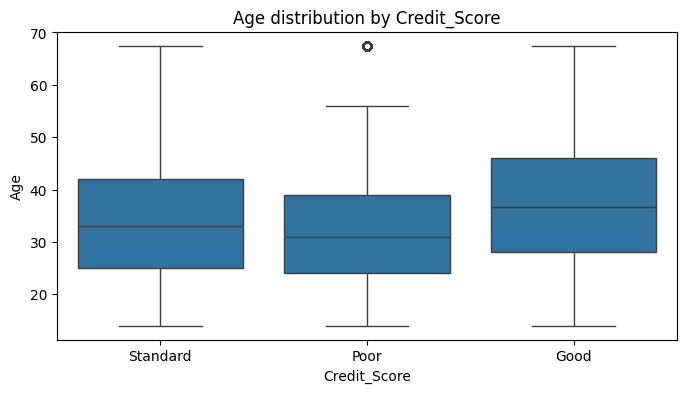

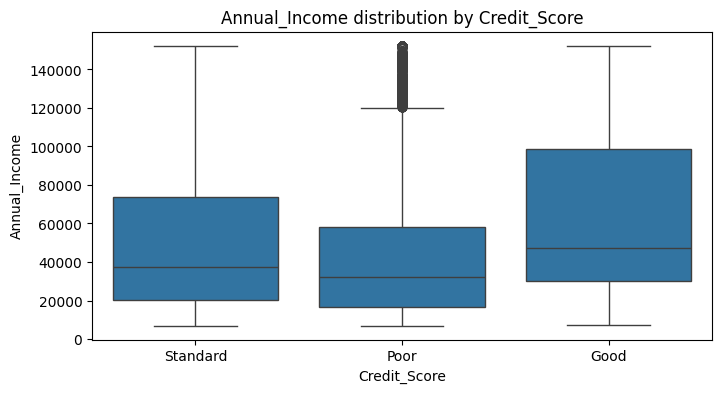

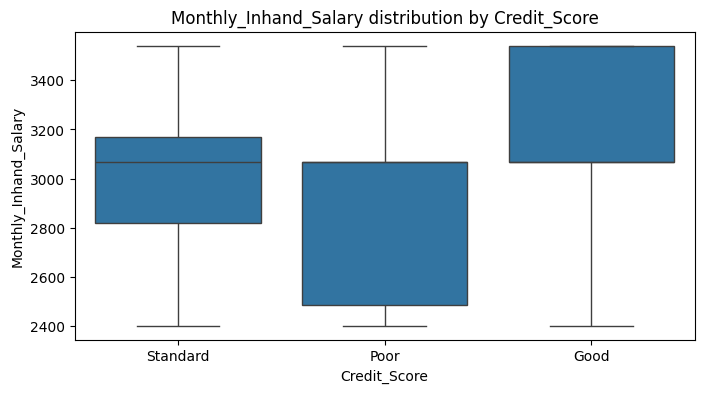

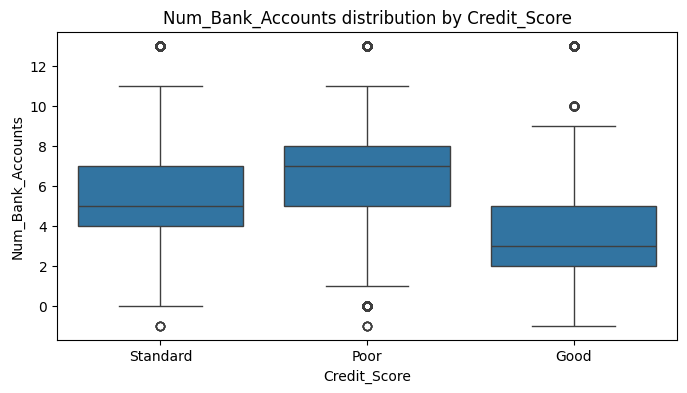

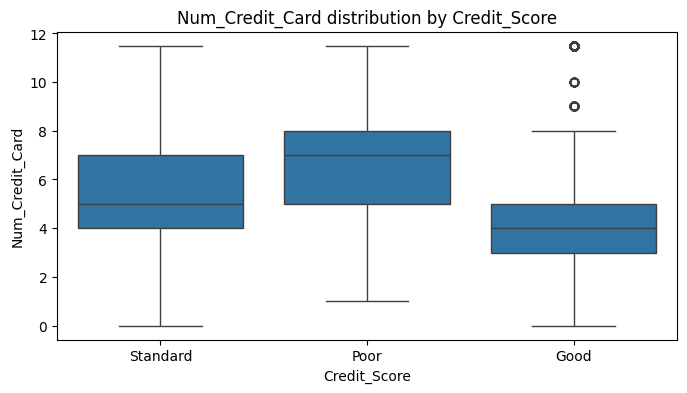

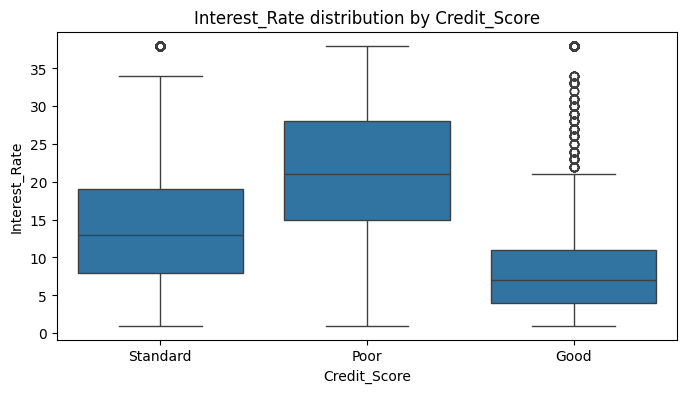

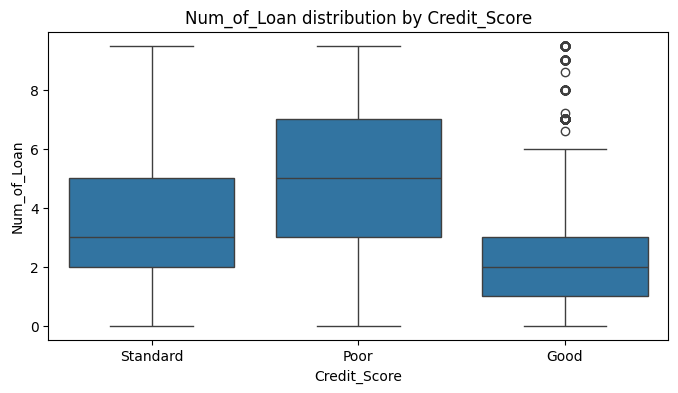

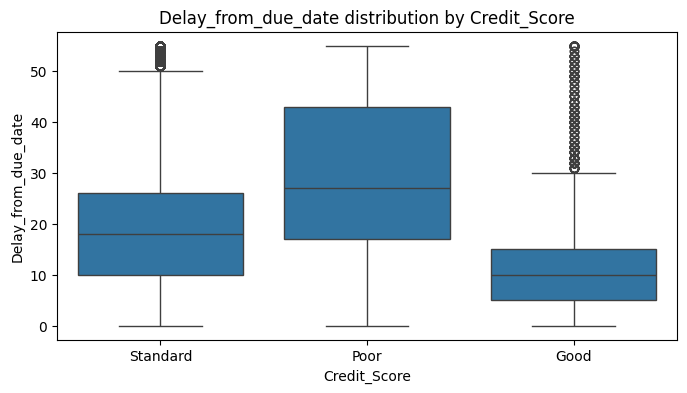

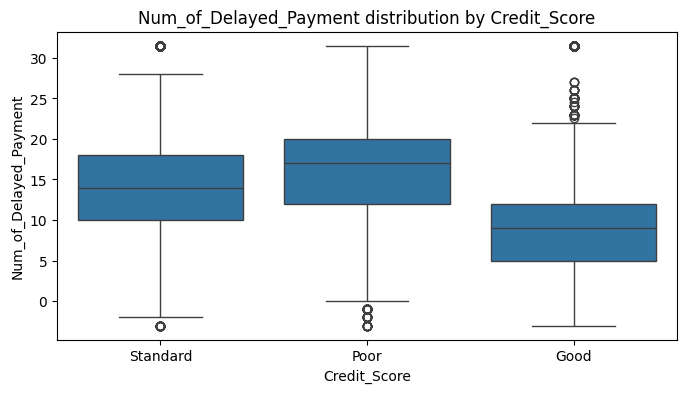

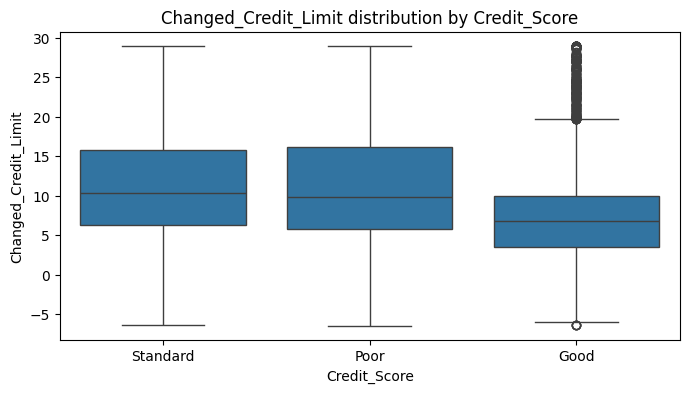

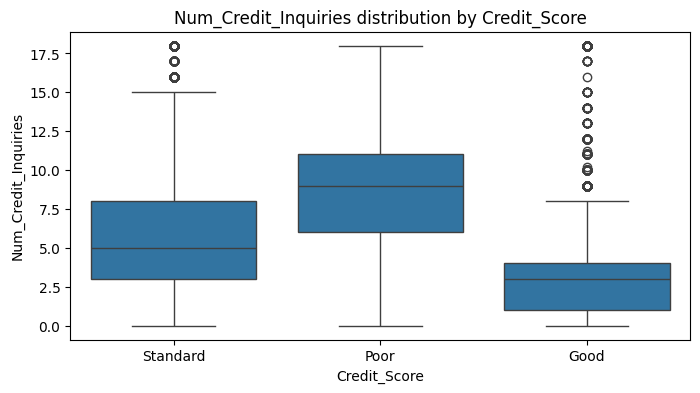

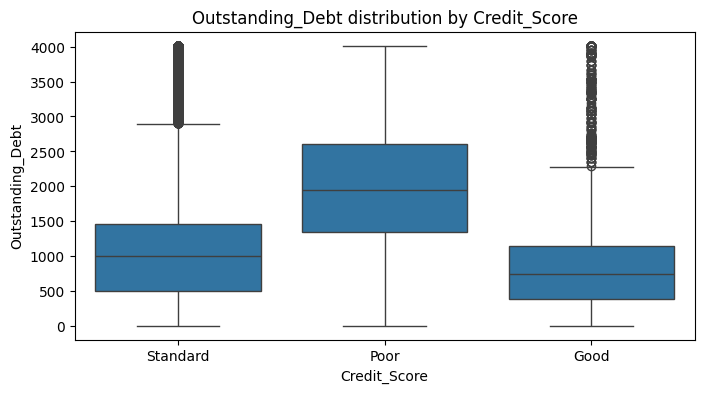

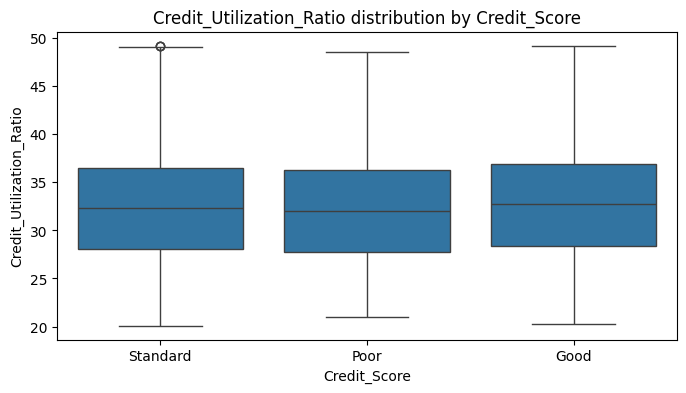

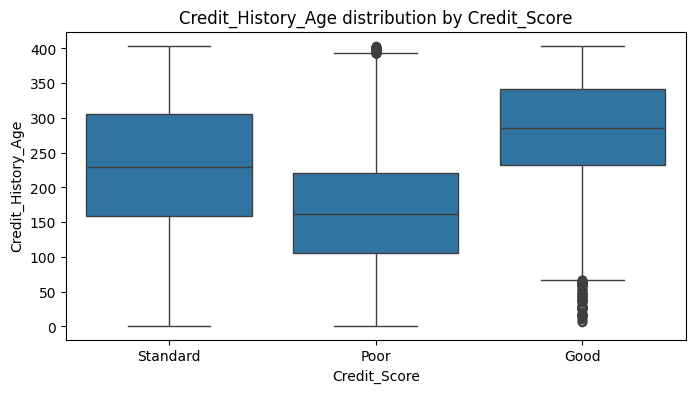

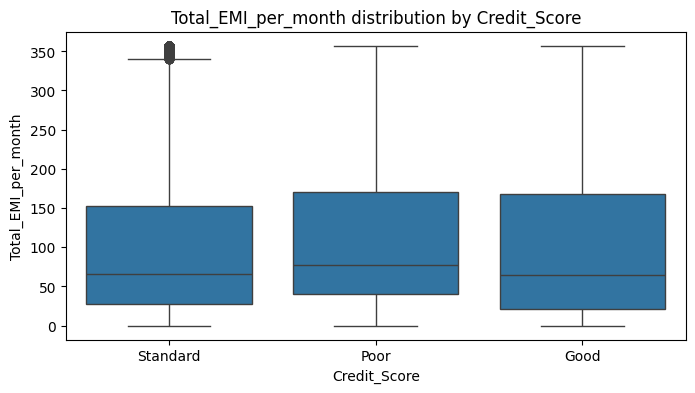

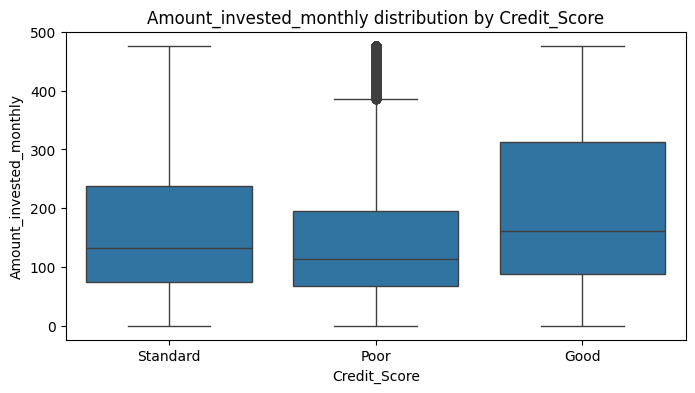

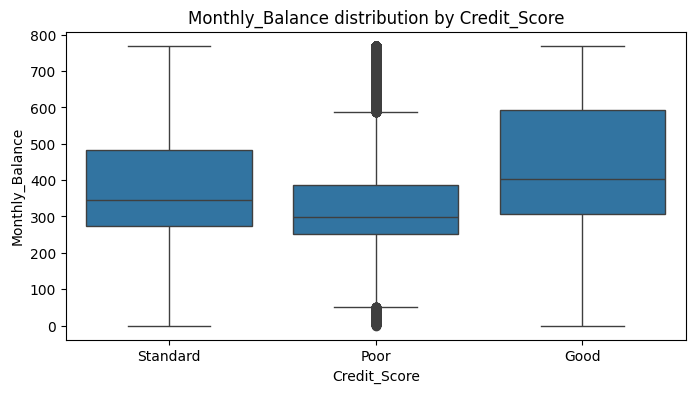

In [26]:
# Boxplots للأعمدة العددية
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Credit_Score', y=col, data=train_plot)
    plt.title(f'{col} distribution by Credit_Score')
    plt.show()

 


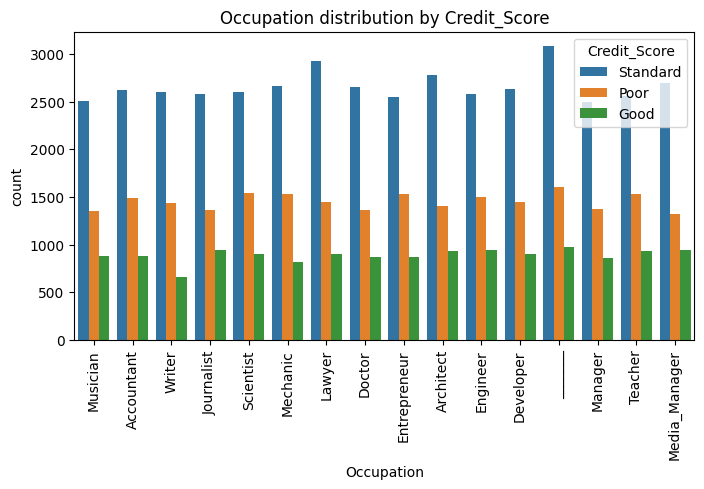

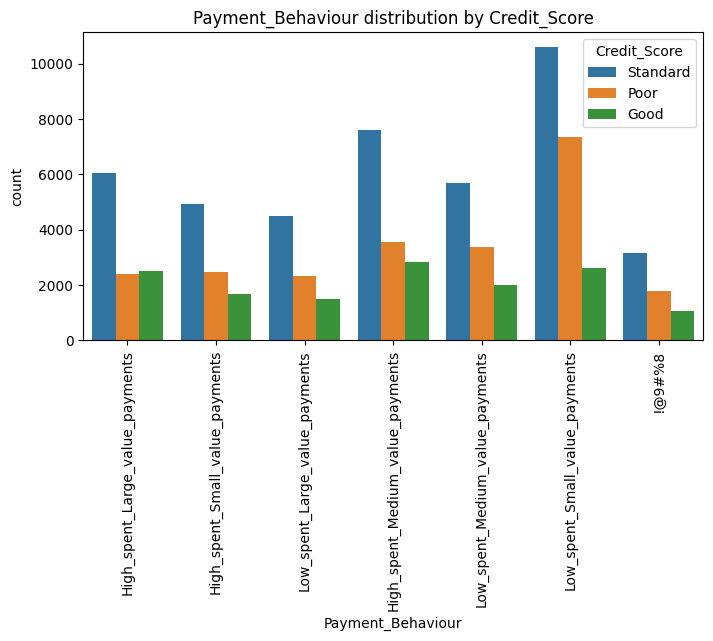

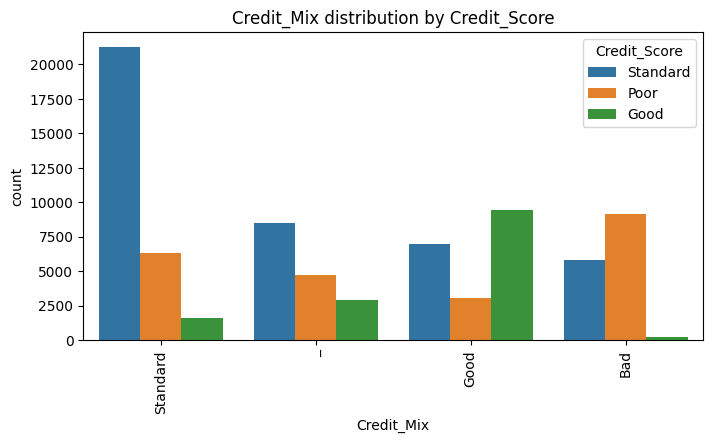

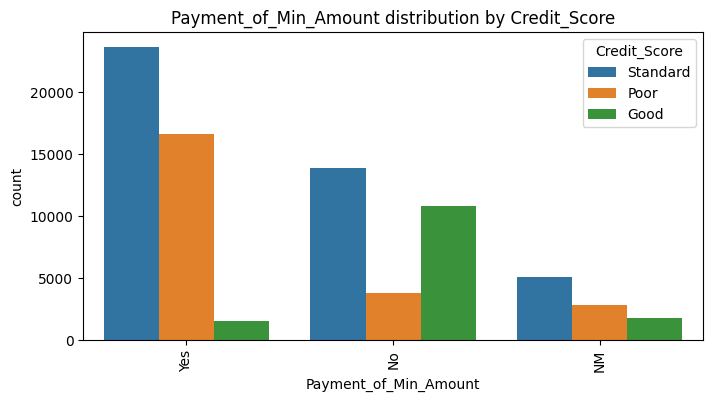

In [27]:
train_plot = x_train.copy()
train_plot['Credit_Score'] = y_train.astype(str)

# Countplots للأعمدة النصية
categorical_features = [
    'Occupation', 'Payment_Behaviour', 'Credit_Mix', 'Payment_of_Min_Amount', 
]

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Credit_Score', data=train_plot)
    plt.title(f'{col} distribution by Credit_Score')
    plt.xticks(rotation=90)
    plt.show()

----------------

# `04` Data Preparation

encoding, scaling


In [28]:
from sklearn.preprocessing import LabelEncoder

le_credit = LabelEncoder()

x_train['Credit_Mix'] = le_credit.fit_transform(x_train['Credit_Mix'])
x_test['Credit_Mix'] = le_credit.transform(x_test['Credit_Mix'])


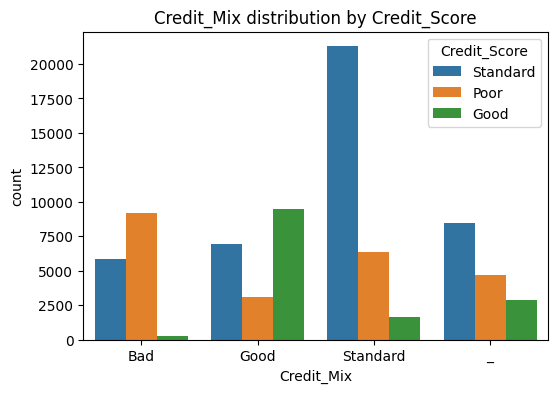

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# فئات العمود قبل التشفير
class_names = le_credit.classes_

plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Mix', hue='Credit_Score', data=x_train.assign(Credit_Score=y_train))
plt.title('Credit_Mix distribution by Credit_Score')
plt.xticks(ticks=range(len(class_names)), labels=class_names)
plt.show()


In [30]:
#Encode 'Occupation' (One-Hot)
# ================================
x_train = pd.get_dummies(x_train, columns=['Occupation'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Occupation'], drop_first=True)

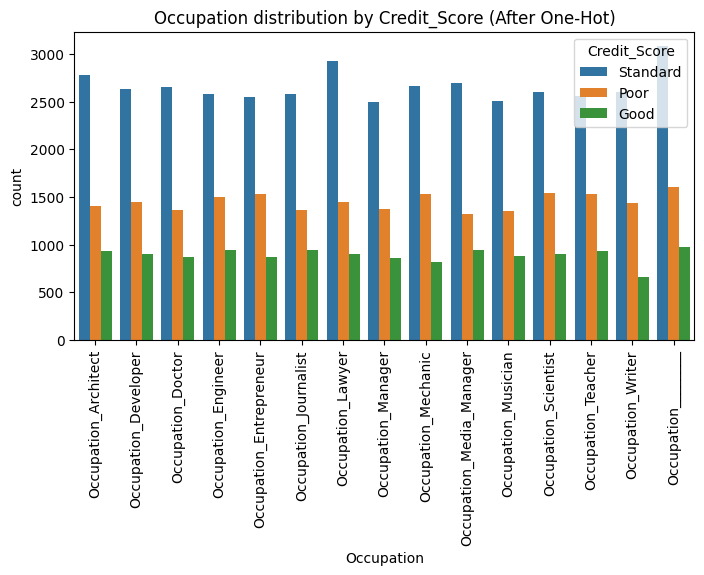

In [31]:
occupation_cols = [col for col in x_train.columns if 'Occupation_' in col]

# عمل نسخة طويلة long format للرسم
plot_data = x_train[occupation_cols].copy()
plot_data['Credit_Score'] = y_train
plot_data = plot_data.melt(id_vars='Credit_Score', var_name='Occupation', value_name='Has_Job')
plot_data = plot_data[plot_data['Has_Job'] == 1]  # فقط الصفوف اللي عندها الوظيفة

plt.figure(figsize=(8,4))
sns.countplot(x='Occupation', hue='Credit_Score', data=plot_data)
plt.title('Occupation distribution by Credit_Score (After One-Hot)')
plt.xticks(rotation=90)
plt.show()


In [32]:
# Encode 'Payment_Behaviour' (One-Hot)
# ================================
x_train = pd.get_dummies(x_train, columns=['Payment_Behaviour'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=['Payment_Behaviour'], drop_first=True)

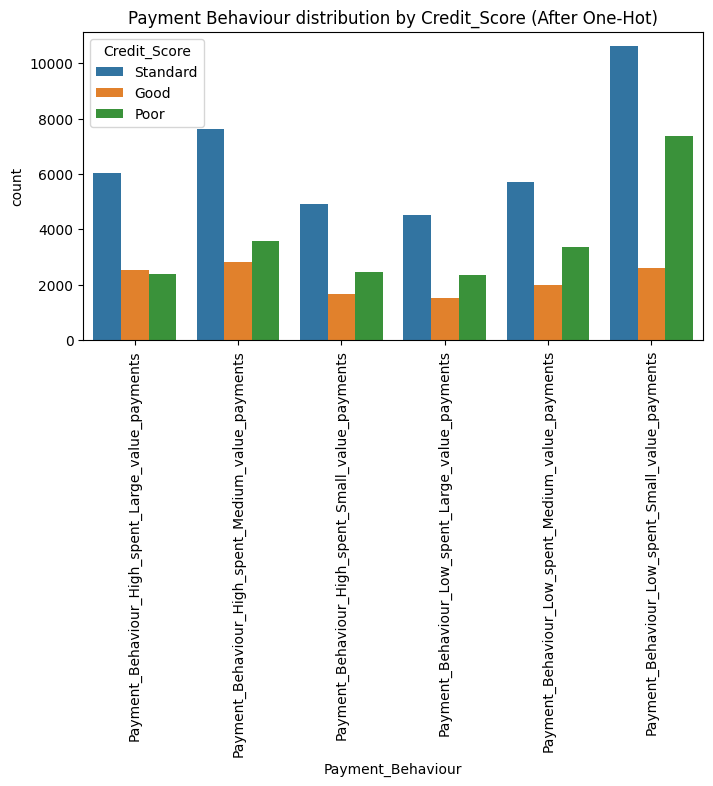

In [33]:
payment_cols = [col for col in x_train.columns if 'Payment_Behaviour_' in col]

# تحويل البيانات للشكل الطويل
plot_data = x_train[payment_cols].copy()
plot_data['Credit_Score'] = y_train
plot_data = plot_data.melt(id_vars='Credit_Score', var_name='Payment_Behaviour', value_name='Has_Behaviour')
plot_data = plot_data[plot_data['Has_Behaviour'] == 1]

plt.figure(figsize=(8,4))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=plot_data)
plt.title('Payment Behaviour distribution by Credit_Score (After One-Hot)')
plt.xticks(rotation=90)
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder

le_pay = LabelEncoder()

x_train['Payment_of_Min_Amount'] = le_pay.fit_transform(x_train['Payment_of_Min_Amount'])
x_test['Payment_of_Min_Amount'] = le_pay.transform(x_test['Payment_of_Min_Amount'])


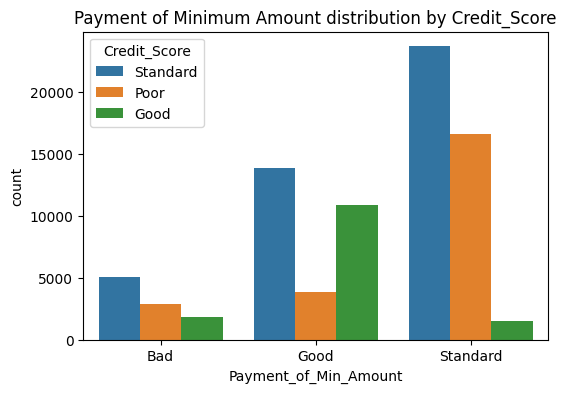

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', 
              data=x_train.assign(Credit_Score=y_train))
plt.title('Payment of Minimum Amount distribution by Credit_Score')

# إعادة تسمية المحور باستخدام القيم الفعلية
ticks = sorted(x_train['Payment_of_Min_Amount'].unique())
plt.xticks(ticks=ticks, labels=[class_names[i] if i<len(class_names) else str(i) for i in ticks])
plt.show()


In [36]:
# نحولها لـ One-Hot Encoding باستخدام MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

train_loan = pd.DataFrame(mlb.fit_transform(x_train['Type_of_Loan']), columns=mlb.classes_, index=x_train.index)
test_loan = pd.DataFrame(mlb.transform(x_test['Type_of_Loan']), columns=mlb.classes_, index=x_test.index)

# ندمج الأعمدة الجديدة مع الداتا الأصلية
x_train = pd.concat([x_train.drop('Type_of_Loan', axis=1), train_loan], axis=1)
x_test = pd.concat([x_test.drop('Type_of_Loan', axis=1), test_loan], axis=1)

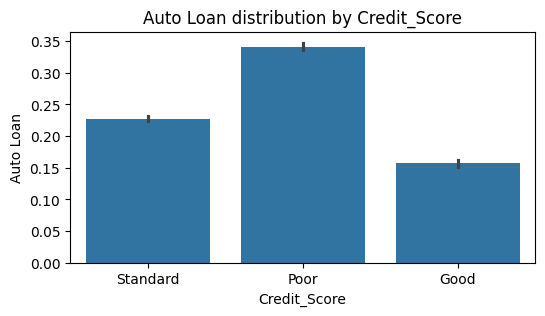

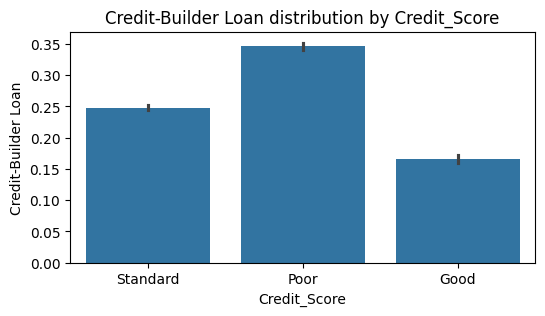

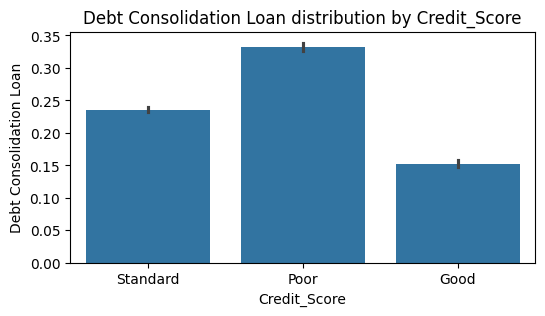

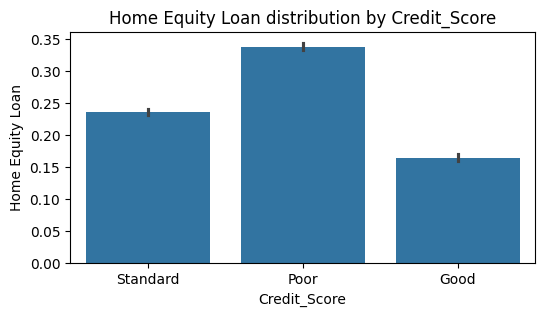

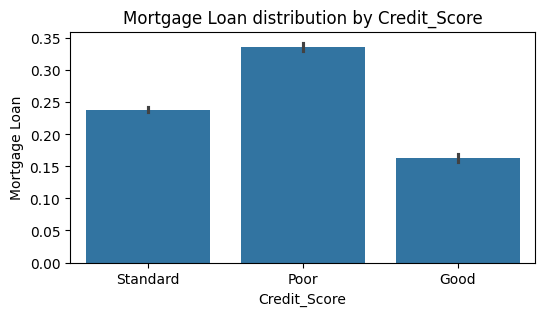

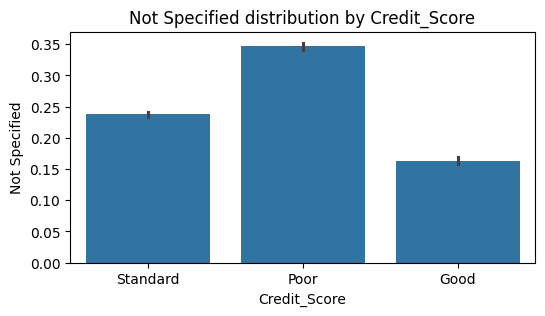

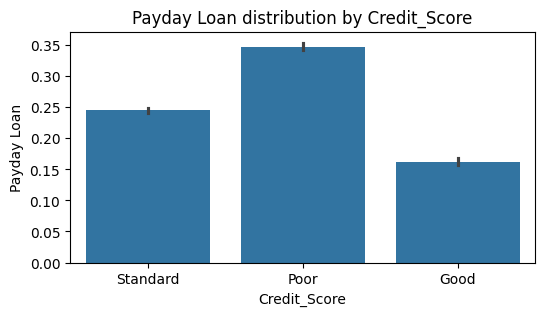

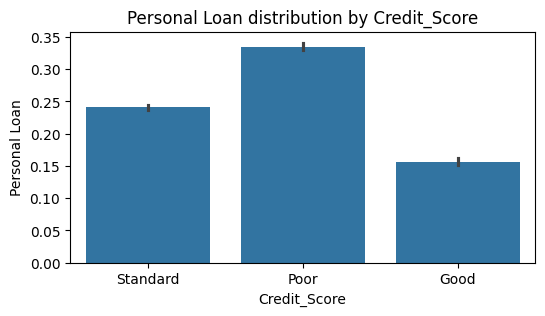

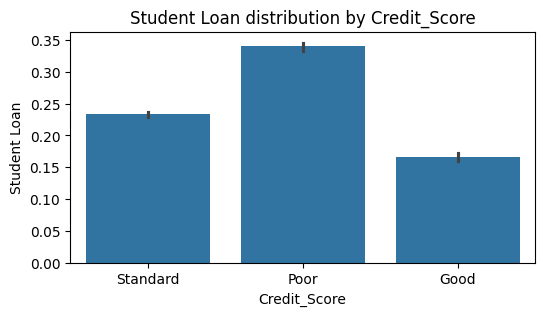

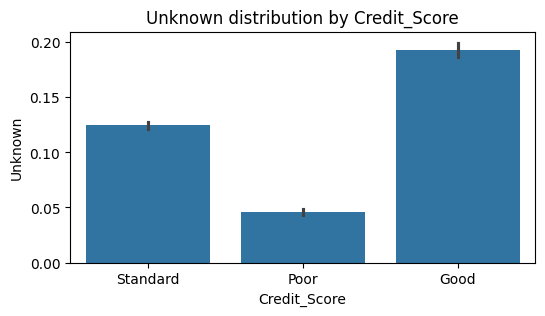

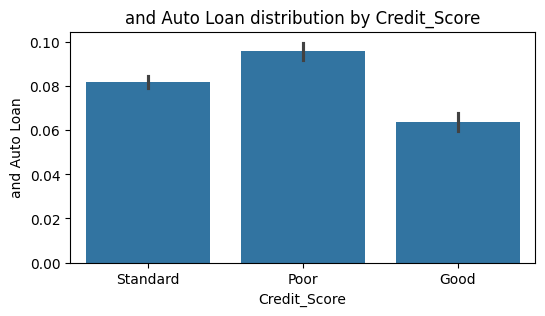

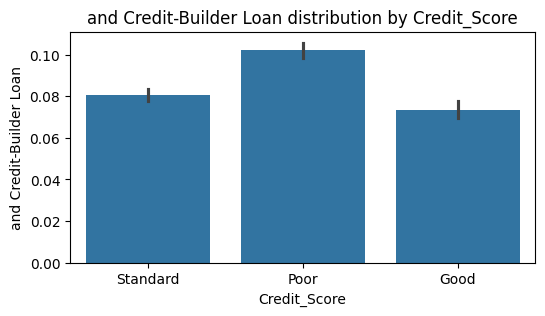

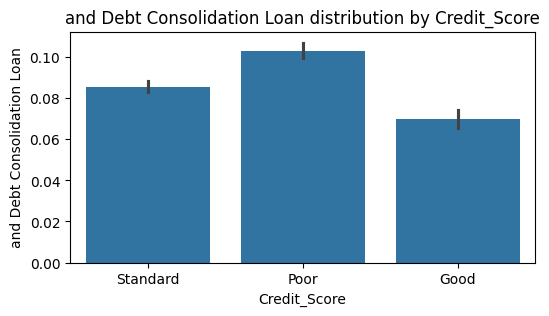

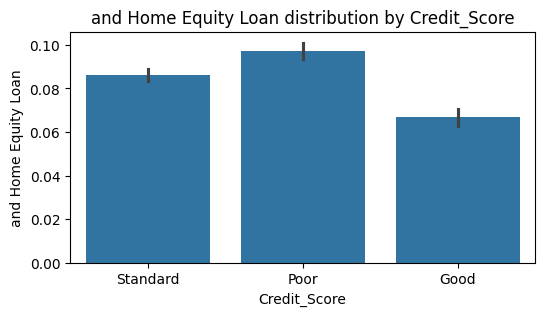

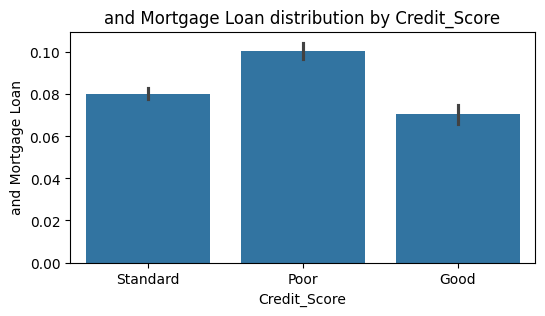

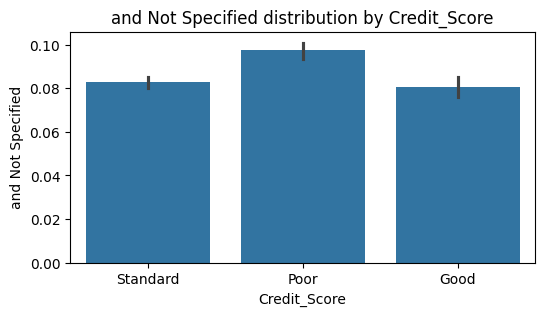

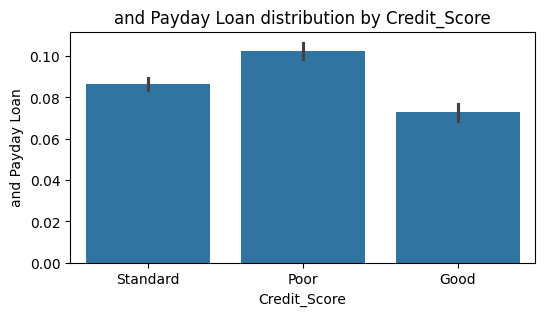

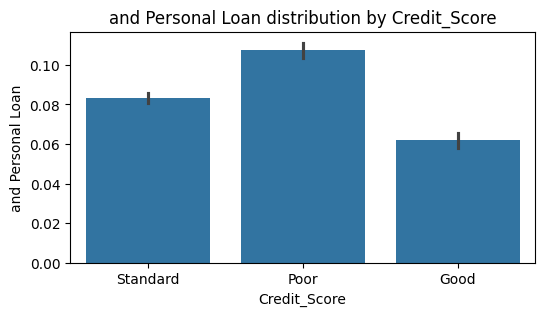

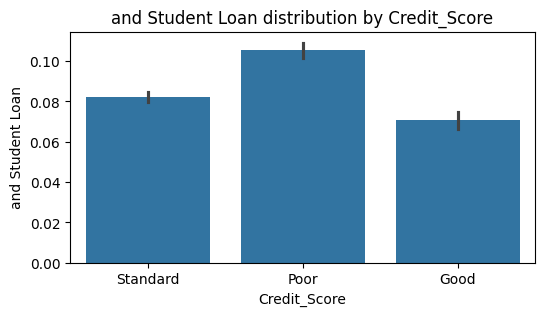

In [37]:
for col in mlb.classes_:
    plt.figure(figsize=(6,3))
    sns.barplot(x='Credit_Score', y=col, data=x_train.assign(Credit_Score=y_train))
    plt.title(f'{col} distribution by Credit_Score')
    plt.show()


In [38]:
# Encode target variable (Ordinal)
# ========================
encoder = OrdinalEncoder(categories=[['Poor', 'Standard', 'Good']])
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded = encoder.transform(y_test.values.reshape(-1,1))

In [39]:
# Scaling numeric columns
# ========================
scaler = RobustScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


----------------------

# `05` Modeling



## `i` Baseline Model Training

## XGboost

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:59:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


===== Train=====
Accuracy: 0.7858
F1 Score: 0.7856
Recall: 0.7858
Confusion Matrix
[[17460  4881   898]
 [ 4511 34960  3094]
 [  138  3614 10444]]


===== Test=====
Accuracy: 0.7395
F1 Score: 0.7394
Recall: 0.7395
Confusion Matrix
[[4093 1404  262]
 [1381 8238  990]
 [  63 1110 2459]]




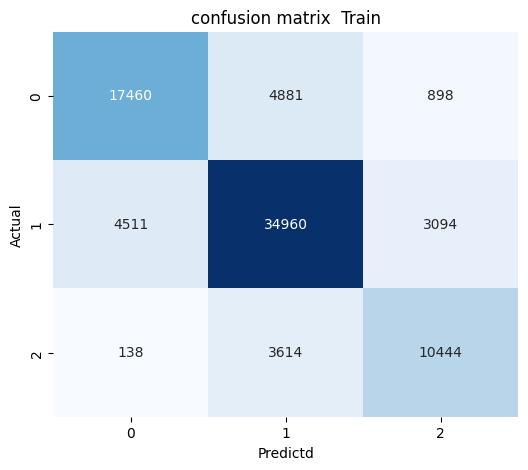

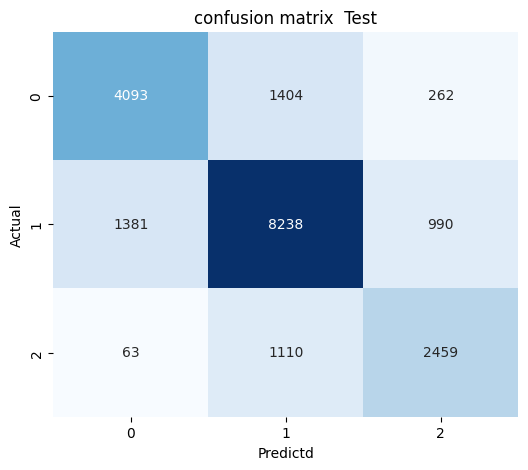

C:\Users\DELL\AppData\Local\Temp\ipykernel_22652\2633820734.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='feature', data=top_features,palette='viridis')


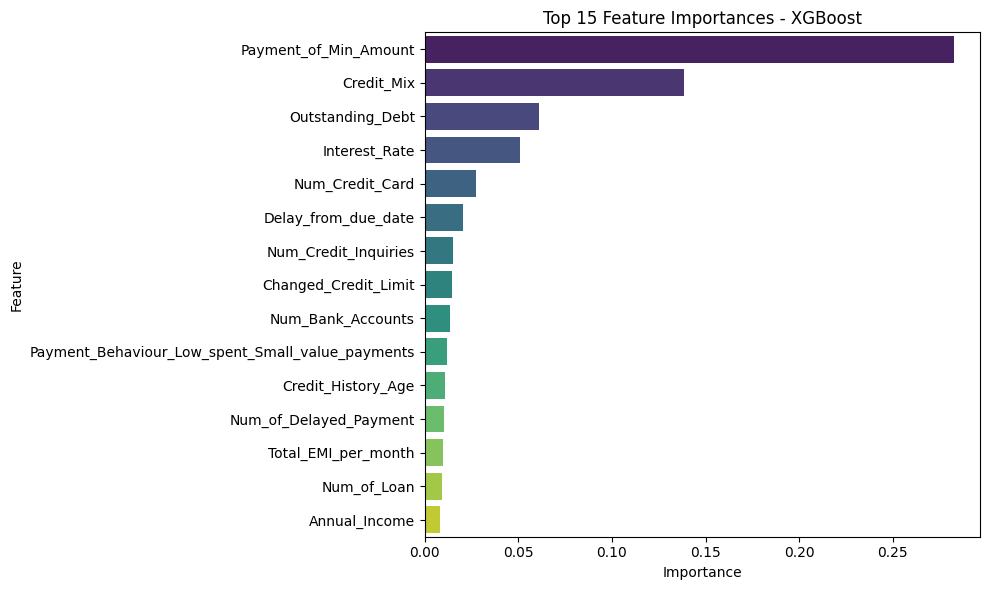

In [40]:
xgb_model=XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(x_train,y_train_encoded.ravel())

y_train_pred=xgb_model.predict(x_train)
y_test_pred=xgb_model.predict(x_test)

def print_metrics(y_true,y_pred,dataset="Dataset"):
    acc=accuracy_score(y_true,y_pred)
    F1=f1_score(y_true,y_pred,average='weighted')
    recall=recall_score(y_true,y_pred,average='weighted')
    cm=confusion_matrix(y_true,y_pred)
    print(f"===== {dataset}=====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {F1:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix")
    print(cm)
    print("\n")

print_metrics(y_train_encoded,y_train_pred,"Train")
print_metrics(y_test_encoded,y_test_pred, "Test")
 
def plot_confusion_matrix(y_true,y_pred,dataset="Dataset"):
    cm=confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
    plt.title(f'confusion matrix  {dataset}')
    plt.xlabel('Predictd')
    plt.ylabel('Actual')
    plt.show()


#plot for train
plot_confusion_matrix(y_train_encoded,y_train_pred, "Train")


#plot for test
plot_confusion_matrix(y_test_encoded,y_test_pred, "Test")

importances=xgb_model.feature_importances_
feature_names=x_train.columns

feat_imp=pd.DataFrame({
    'feature':feature_names,
    'Importance':importances
}
)
feat_imp=feat_imp.sort_values(by='Importance',ascending=False).reset_index(drop=True)

top_features=feat_imp.head(15)

#feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='feature', data=top_features,palette='viridis')
plt.title("Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

===== Train =====
Accuracy: 0.8236
F1 Score: 0.8237
Recall: 0.8236
Confusion Matrix
[[18584  3498  1157]
 [ 3746 36287  2532]
 [   43  3138 11015]]


===== Test =====
Accuracy: 0.7508
F1 Score: 0.7513
Recall: 0.7508
Confusion Matrix
[[4179 1276  304]
 [1248 8293 1068]
 [  27 1061 2544]]




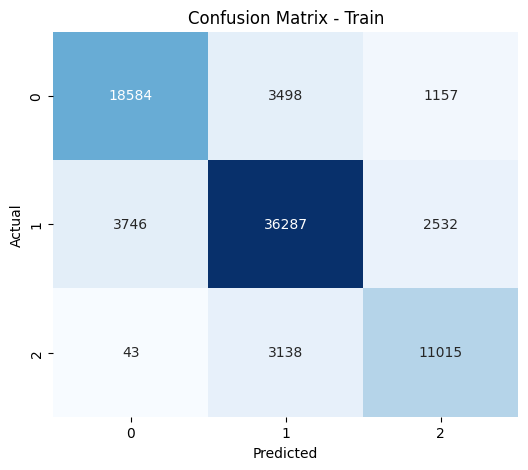

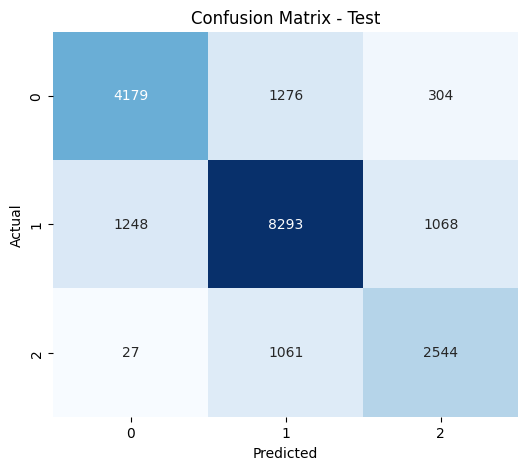

C:\Users\DELL\AppData\Local\Temp\ipykernel_22652\3990218510.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='feature', data=top_features, palette='viridis')


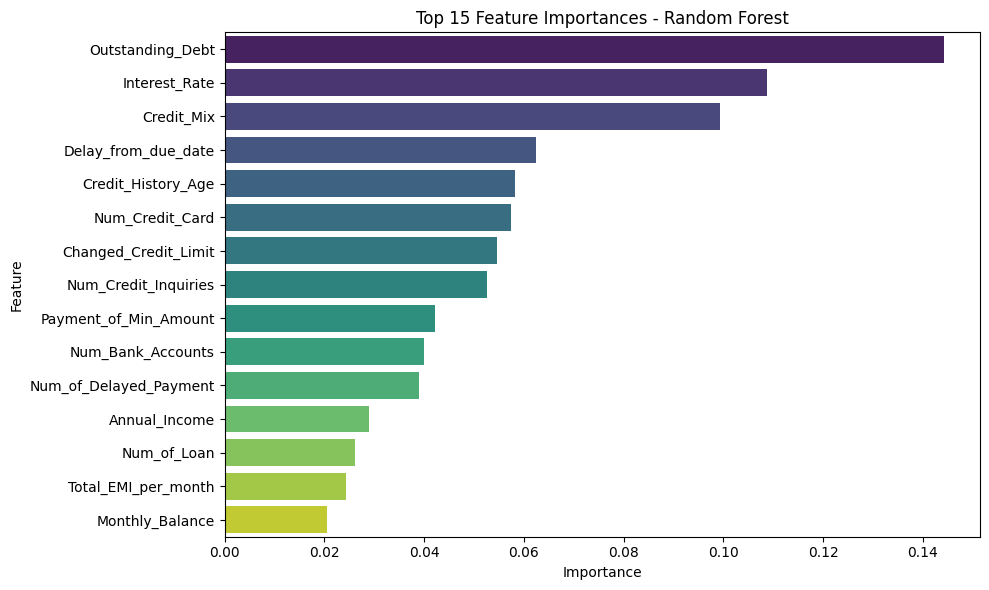

In [41]:


# إنشاء نموذج Random Forest
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=1
)

# تدريب الموديل
rf_model.fit(x_train, y_train_encoded.ravel())

# التنبؤ
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# دالة لطباعة المقاييس
def print_metrics(y_true, y_pred, dataset="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"===== {dataset} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {F1:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix")
    print(cm)
    print("\n")

# طباعة المقاييس
print_metrics(y_train_encoded, y_train_pred, "Train")
print_metrics(y_test_encoded, y_test_pred, "Test")

# دالة لرسم Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, dataset="Dataset"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {dataset}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# رسم الـ Confusion Matrix
plot_confusion_matrix(y_train_encoded, y_train_pred, "Train")
plot_confusion_matrix(y_test_encoded, y_test_pred, "Test")

# Feature Importance
importances = rf_model.feature_importances_
feature_names = x_train.columns

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_features = feat_imp.head(15)

# رسم Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='feature', data=top_features, palette='viridis')
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##DecisionTreeClassifier

===== Train =====
Accuracy: 0.7647
F1 Score: 0.7641
Recall: 0.7647
Confusion Matrix
[[17438  4803   998]
 [ 4284 34598  3683]
 [  198  4861  9137]]


===== Test =====
Accuracy: 0.7065
F1 Score: 0.7056
Recall: 0.7065
Confusion Matrix
[[4002 1474  283]
 [1409 8067 1133]
 [  91 1481 2060]]




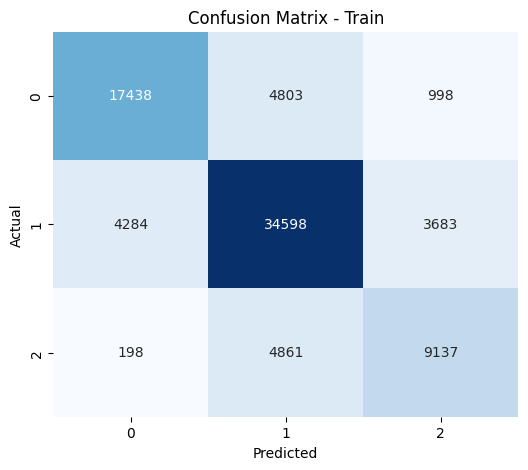

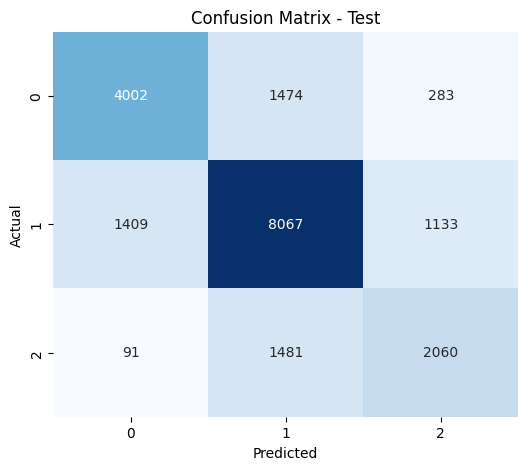

C:\Users\DELL\AppData\Local\Temp\ipykernel_22652\1480031702.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='feature', data=top_features, palette='viridis')


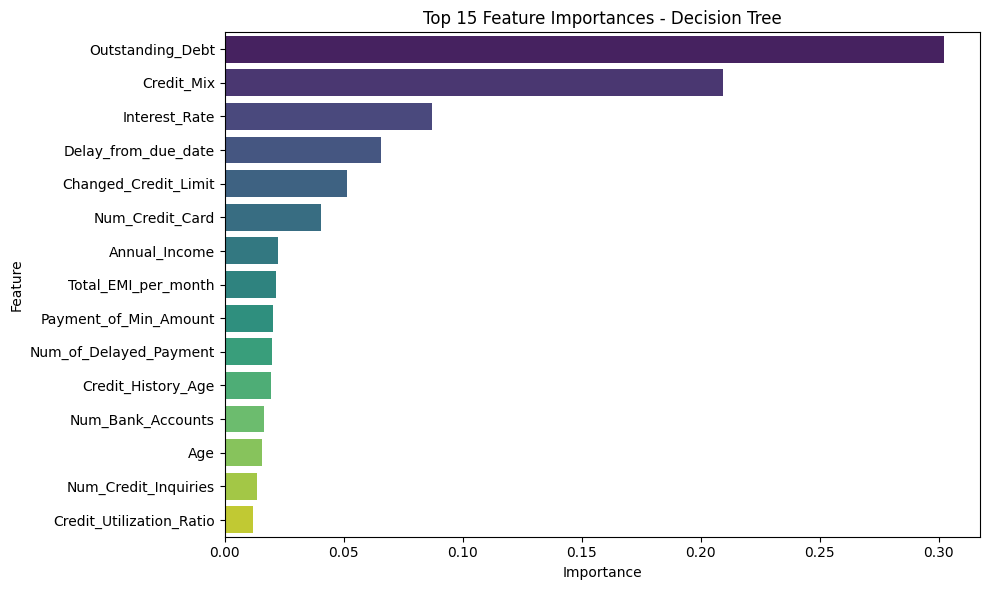

In [42]:
 

# إنشاء نموذج Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=12,       
    random_state=42
)

# تدريب الموديل
dt_model.fit(x_train, y_train_encoded.ravel())

# التنبؤ
y_train_pred = dt_model.predict(x_train)
y_test_pred = dt_model.predict(x_test)

# دالة لطباعة المقاييس
def print_metrics(y_true, y_pred, dataset="Dataset"):
    acc = accuracy_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    print(f"===== {dataset} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {F1:.4f}")
    print(f"Recall: {recall:.4f}")
    print("Confusion Matrix")
    print(cm)
    print("\n")

# طباعة المقاييس
print_metrics(y_train_encoded, y_train_pred, "Train")
print_metrics(y_test_encoded, y_test_pred, "Test")

# دالة لرسم Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, dataset="Dataset"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {dataset}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# رسم الـ Confusion Matrix
plot_confusion_matrix(y_train_encoded, y_train_pred, "Train")
plot_confusion_matrix(y_test_encoded, y_test_pred, "Test")

# Feature Importance
importances = dt_model.feature_importances_
feature_names = x_train.columns

feat_imp = pd.DataFrame({
    'feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

top_features = feat_imp.head(15)

# رسم Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='feature', data=top_features, palette='viridis')
plt.title("Top 15 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


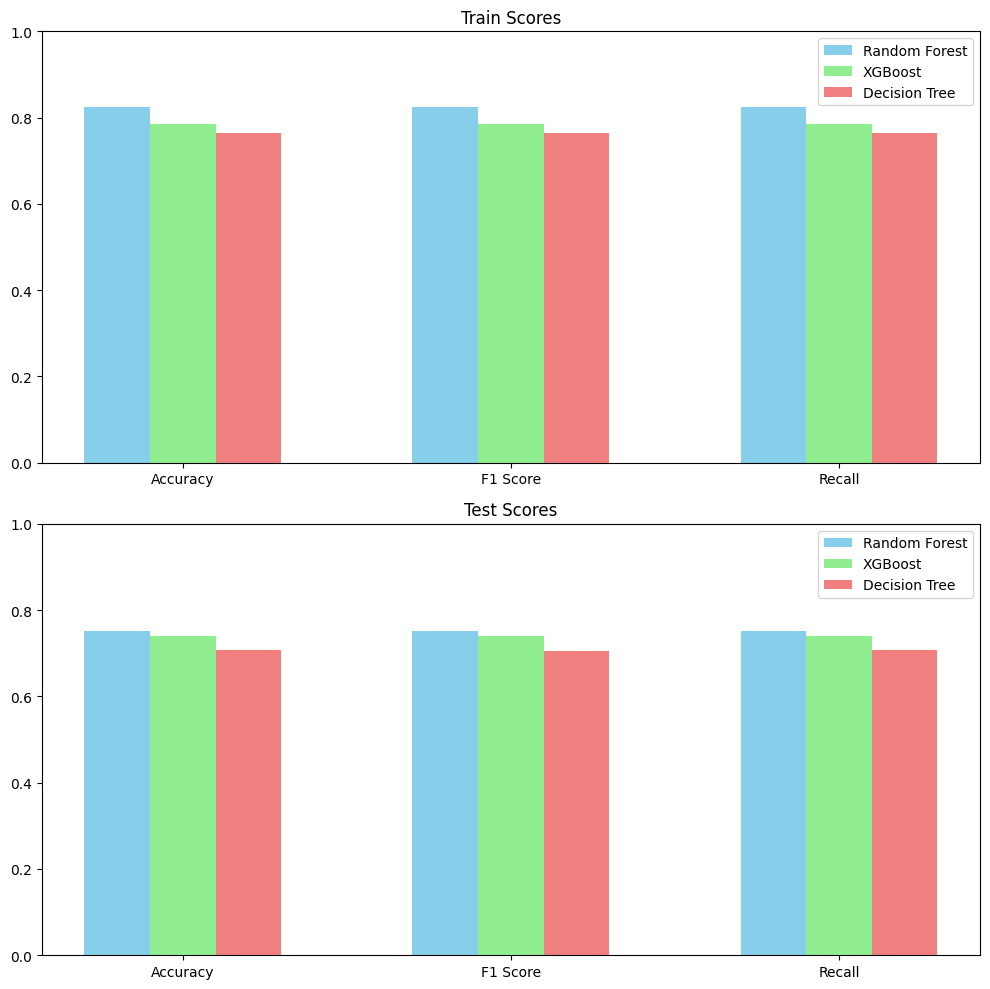

In [43]:
 

metrics = ['Accuracy', 'F1 Score', 'Recall']

# القيم لكل موديل
rf_scores = [0.8236, 0.8237, 0.8236]
xgb_scores = [0.7858, 0.7856, 0.7858]
dt_scores = [0.7647, 0.7641, 0.7647]

rf_scores_test = [0.7508, 0.7513, 0.7508]
xgb_scores_test = [0.7395, 0.7394, 0.7395]
dt_scores_test = [0.7065, 0.7056, 0.7065]

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(2, 1, figsize=(10,10))

# ===== Train =====
ax[0].bar(x - width, rf_scores, width, label='Random Forest', color='skyblue')
ax[0].bar(x, xgb_scores, width, label='XGBoost', color='lightgreen')
ax[0].bar(x + width, dt_scores, width, label='Decision Tree', color='lightcoral')
ax[0].set_xticks(x)
ax[0].set_xticklabels(metrics)
ax[0].set_ylim(0,1)
ax[0].set_title('Train Scores')
ax[0].legend()

# ===== Test =====
ax[1].bar(x - width, rf_scores_test, width, label='Random Forest', color='skyblue')
ax[1].bar(x, xgb_scores_test, width, label='XGBoost', color='lightgreen')
ax[1].bar(x + width, dt_scores_test, width, label='Decision Tree', color='lightcoral')
ax[1].set_xticks(x)
ax[1].set_xticklabels(metrics)
ax[1].set_ylim(0,1)
ax[1].set_title('Test Scores')
ax[1].legend()

plt.tight_layout()
plt.show()


In [44]:
import pickle

# حفظ موديل Random Forest (كمثال)
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

import pickle
from sklearn.preprocessing import LabelEncoder

# مثال لـ Credit_Mix
with open("Credit_Mix_encoder.pkl", "wb") as f:
    pickle.dump(le_credit, f)

# مثال لـ Payment_of_Min_Amount
with open("Payment_of_Min_Amount_encoder.pkl", "wb") as f:
    pickle.dump(le_pay, f)

with open("Type_of_Loan_mlb.pkl", "wb") as f:
    pickle.dump(mlb, f)
with open("target_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

 